# Семинар 5. Степенной метод

## Экспериментально посмотрим на сходимость степенного метода

$$x_{k+1} = \frac{Ax_k}{\|Ax_k\|} $$

- Теоретическая скорость сходимости **линейная** с фактором $\frac{|\lambda_2|}{|\lambda_1|}$

In [1]:
import numpy as np

def power_method(A, x0, max_iter, eps):
    x = x0.copy()
    conv = [x.copy()]
    for i in range(max_iter):
        x = A @ x
        x = x / np.linalg.norm(x)
        conv.append(x)
        eigval = x @ (A @ x)
        res = A @ x - eigval * x
        if np.linalg.norm(res) < eps:
            break
    return x, eigval, conv

### Симметричная положительно определённая матрица

In [2]:
# np.random.seed(0)
n = 10
A = np.random.randn(n, n)
A = A.T @ A

true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
# print(true_eigvec)
print(np.linalg.norm(A @ true_eigvec - true_eigvec @ np.diag(true_eigvals)))

[ 0.06808263  0.69158461  1.22350073  3.27008031  3.7435356   6.46606444
 13.00530571 15.59054621 17.70457362 34.75891576]
2.915565613805104e-14


In [3]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 2000, 1e-10)
print(max_eigvec)
print(max_eigval)

[-0.03629112 -0.13798574 -0.01579969  0.16441213  0.08887001  0.02681952
 -0.17934189  0.31288732 -0.67145353 -0.60235614]
34.75891576028477


0.999999999961339


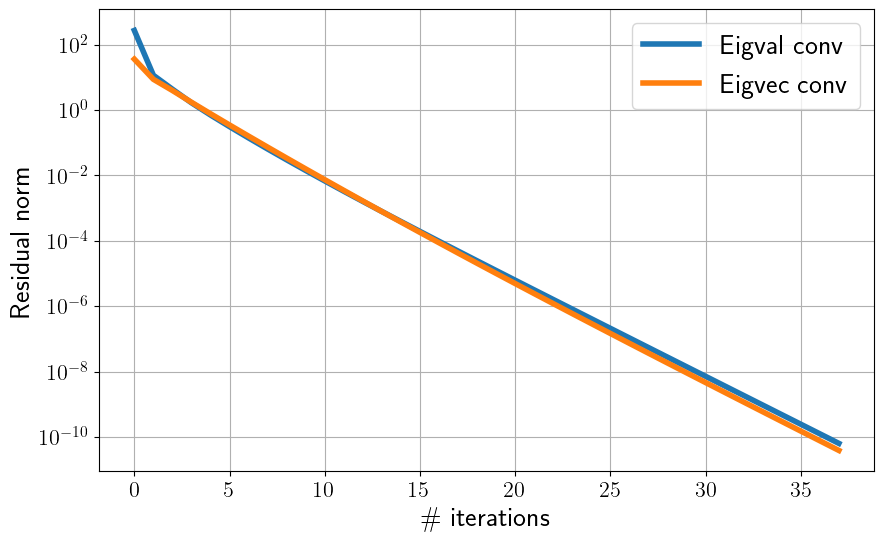

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)

power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")
power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, -1] * true_eigvec[:, -1]) for x in conv])
print(conv[-1][0] / true_eigvec[0, -1])
# power_method_eigvec_conv = np.array([np.linalg.norm(x - true_eigvec[:, -1]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [5]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
print(true_eigvals[-2] / true_eigvals[-1])

[0.04259983 0.37438029 0.38433461 0.42294597 0.44045504 0.45090556
 0.45921549 0.46643615 0.47281316 0.47845156 0.48342262 0.48777877
 0.49156118 0.49480784 0.4975595  0.49986191 0.50176512 0.50332111
 0.50458099 0.50559276 0.50639969 0.50703962 0.50754477 0.50794204
 0.50825355 0.50849721 0.50868747 0.50883576 0.50895131 0.5090412
 0.50911053 0.50916558 0.50920704 0.50924163 0.50926715 0.50928581
 0.50931423]
[0.24128061 0.4545608  0.43684027 0.4459847  0.45226808 0.45660724
 0.46004987 0.4630645  0.4658522  0.46850114 0.47105076 0.47351852
 0.47591117 0.47822975 0.48047206 0.48263401 0.48471054 0.48669634
 0.4885864  0.49037644 0.49206317 0.49364453 0.49511976 0.49648937
 0.49775506 0.49891963 0.49998676 0.50096086 0.50184689 0.50265026
 0.50337638 0.50403106 0.50461969 0.50514836 0.50562178 0.50604651
 0.50642509]
0.5093534488710948


### Симметричная матрица

- Cобственные значений вещественные

In [14]:
n = 10
A = np.random.randn(n, n)
A = A + A.T
true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
print(true_eigvec)

[-8.83518119 -4.91352505 -3.16627378 -2.45878223  0.28991621  0.64613829
  3.36217824  5.24099864  6.10379713  7.94348567]
[[ 0.6020102  -0.12494657  0.41606383  0.36093916  0.15456977 -0.32218064
   0.25043535  0.34261853  0.09693725  0.03730358]
 [ 0.26779331  0.07286725 -0.27453594 -0.1317005  -0.3655324   0.19062354
  -0.32894312  0.6139268  -0.15389535  0.38925231]
 [-0.30294144 -0.03131553 -0.06778565 -0.03521638  0.3161883   0.23933993
   0.48862345  0.51340988 -0.43269387 -0.23363546]
 [ 0.19829293 -0.57735733  0.01233696 -0.5416185  -0.38382615  0.03500667
   0.25943989  0.0045024   0.14931206 -0.30929632]
 [-0.40300635 -0.05941947  0.33176972 -0.43635336  0.09660423 -0.46860307
   0.0589748   0.1476176   0.03849042  0.52716989]
 [-0.30768828  0.16045846  0.49859415  0.24382676 -0.64640861 -0.07667247
  -0.08335025  0.11013204 -0.21883584 -0.28433285]
 [ 0.28085678 -0.0761811   0.05041834 -0.05065537 -0.09617747 -0.01982607
   0.16806174 -0.44165011 -0.76885729  0.29346832]
 [

In [15]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 4000, 1e-10)
print(max_eigvec)
print(max_eigval)

[ 0.6020102   0.26779331 -0.30294144  0.19829293 -0.40300635 -0.30768828
  0.28085678 -0.12419339 -0.02104199  0.2879989 ]
-8.835181187075966


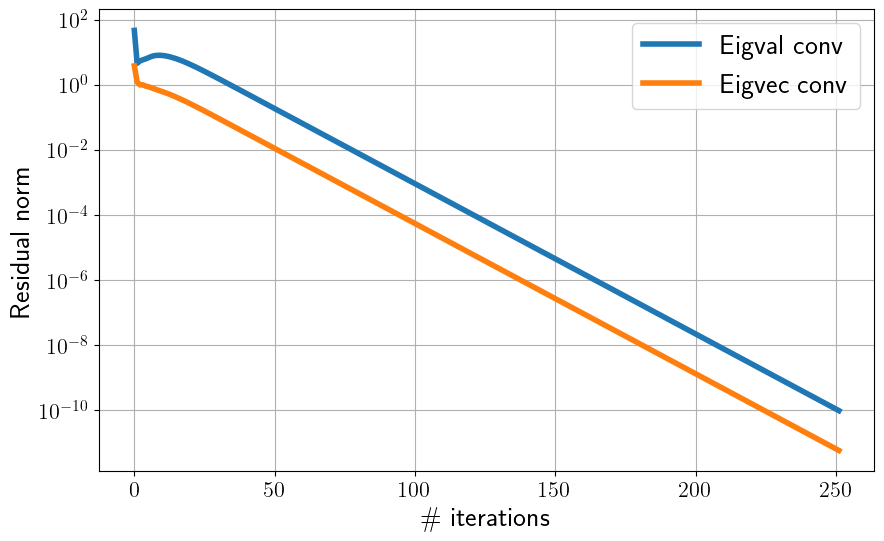

In [16]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [17]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
sorted_abs_eigvals = np.sort(np.abs(true_eigvals))
print(sorted_abs_eigvals[-2] / sorted_abs_eigvals[-1])

[0.09779439 1.17550874 1.0864226  1.06622981 1.08725193 1.08655193
 1.05912324 1.02872087 1.00483924 0.98712151 0.97345181 0.96229485
 0.95281236 0.94459246 0.93743311 0.93121988 0.92586746 0.92129601
 0.91742445 0.91417082 0.91145488 0.90920077 0.90733896 0.90580734
 0.90455149 0.90352453 0.90268659 0.9020041  0.90144904 0.90099813
 0.90063219 0.90033544 0.90009493 0.89990011 0.89974237 0.89961468
 0.89951135 0.89942775 0.89936013 0.89930543 0.8992612  0.89922543
 0.89919651 0.89917313 0.89915422 0.89913894 0.89912658 0.89911659
 0.89910852 0.89910199 0.89909671 0.89909244 0.899089   0.89908621
 0.89908395 0.89908213 0.89908066 0.89907947 0.89907851 0.89907773
 0.8990771  0.89907659 0.89907618 0.89907585 0.89907558 0.89907537
 0.89907519 0.89907505 0.89907493 0.89907484 0.89907477 0.89907471
 0.89907466 0.89907462 0.89907459 0.89907456 0.89907454 0.89907452
 0.89907451 0.8990745  0.89907449 0.89907448 0.89907448 0.89907447
 0.89907447 0.89907446 0.89907446 0.89907446 0.89907446 0.8990

## Несимметричная матрица

In [33]:
A = np.random.randn(n, n)
# A = S Lambda S^{-1}
true_eigvals, true_eigvec = np.linalg.eig(A)
print(true_eigvals)
print(np.sort(np.abs(true_eigvals)))
print(true_eigvec)

[-0.30568002+3.533639j   -0.30568002-3.533639j    2.99130668+0.j
  1.04964487+2.1081206j   1.04964487-2.1081206j  -2.4064254 +0.j
 -1.04290334+0.30873957j -1.04290334-0.30873957j  0.4437478 +0.782783j
  0.4437478 -0.782783j  ]
[0.89981184 0.89981184 1.0876431  1.0876431  2.35497916 2.35497916
 2.4064254  2.99130668 3.54683589 3.54683589]
[[ 0.1016749 +0.22949085j  0.1016749 -0.22949085j -0.37927134+0.j
  -0.39352401-0.0904079j  -0.39352401+0.0904079j   0.1354034 +0.j
  -0.28239093-0.1356551j  -0.28239093+0.1356551j   0.11779138+0.27245199j
   0.11779138-0.27245199j]
 [-0.10368293-0.24567822j -0.10368293+0.24567822j -0.34720671+0.j
  -0.07924885-0.28554134j -0.07924885+0.28554134j -0.72331285+0.j
   0.04607513+0.16377361j  0.04607513-0.16377361j  0.05199384-0.20684599j
   0.05199384+0.20684599j]
 [ 0.05344519-0.23595397j  0.05344519+0.23595397j -0.16421736+0.j
  -0.14261505+0.28150558j -0.14261505-0.28150558j  0.37541665+0.j
   0.53185092+0.j          0.53185092-0.j          0.18358285-

In [36]:
x0 = np.random.randn(n) + 1j * np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 4000, 1e-6)
print(max_eigvec)
print(max_eigval, abs(max_eigval))

[ 0.04136552+0.12920278j -0.04079718-0.13167152j  0.06412667+0.07045318j
 -0.02175816-0.0294996j  -0.09934385-0.11005943j  0.40674211+0.77527383j
  0.12428742+0.19493019j -0.03919112-0.01813507j -0.09962207-0.25786673j
 -0.06876153-0.16506166j]
(0.4245162912002967-0.5584479611639757j) 0.7014828628146638


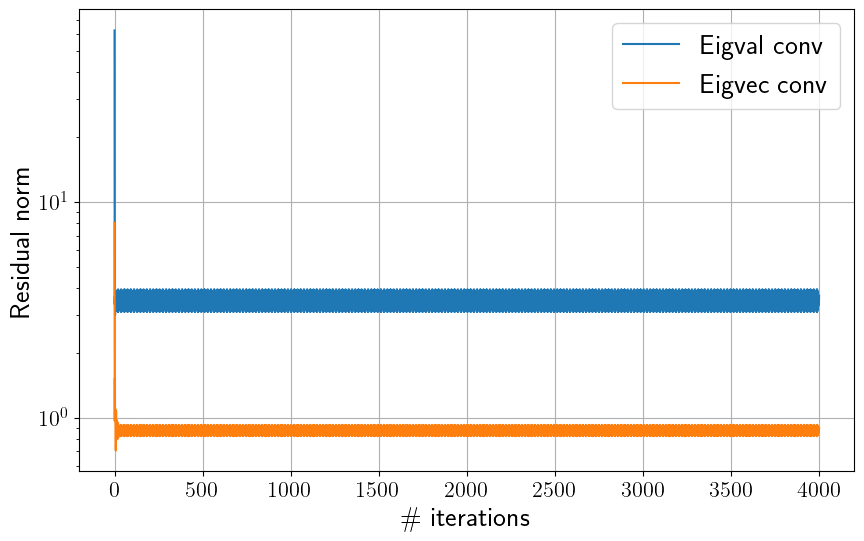

In [37]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x.conj() @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [38]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
sorted_abs_eigvals = np.sort(np.abs(true_eigvals))
print(sorted_abs_eigvals[-2] / sorted_abs_eigvals[-1])

[0.05384751 1.08517904 0.82011982 ... 1.02005624 0.94187804 1.10573788]
[0.12097003 1.57878269 0.63418244 ... 1.00997834 0.97050402 1.05154072]
1.0


### Если $\lambda^*_2 = \lambda_1$, то степенной метод осциллирует и не сходится! 

## Блочный степенной метод

- Ищем $k$ cтарших собственных значения и вектора
- Этапы аналогичны степенному методу для максимального по модулю собственного значения
    - Умножение матрицы на набор векторов
    - Аналог нормализации для матриц?

In [40]:
def block_power_method(A, x0, max_iter, eps):
    x = x0.copy()
    conv_vec = [x]
    conv_val = [np.einsum('ik,ij,jk->k',x, A, x)]
    for i in range(max_iter):
        x = A @ x
        x, _ = np.linalg.qr(x)
        conv_vec.append(x)
        eigval = np.einsum('ik,ij,jk->k', x.conj(), A, x)
        conv_val.append(eigval)
        res = A @ x - (eigval[:, np.newaxis] * x.T).T
        if np.linalg.norm(res) < eps:
            break
    return x, eigval, conv_vec, conv_val

In [46]:
block_size = 3
n = 10
A = np.random.randn(n, n)
A = A.T @ A
true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
print(true_eigvec)

[ 0.15611677  0.85224764  1.42065824  2.90116952  8.70576013 10.59997093
 13.54428634 18.99125387 23.74548123 33.26707067]
[[ 0.21699631  0.03384545  0.90017072 -0.03304932 -0.09599421  0.27997389
   0.07801072 -0.02516794 -0.16323555 -0.13929215]
 [ 0.02797648  0.13638326 -0.06854617  0.35191775 -0.72707335 -0.34867641
   0.09020236  0.12723872 -0.38536191 -0.17038598]
 [ 0.35640633  0.07810744 -0.09257491 -0.78377359 -0.08846829 -0.18685005
  -0.2419414   0.24338936 -0.2888745   0.0063655 ]
 [-0.33454677 -0.04616541  0.08803695 -0.32628773 -0.04080264 -0.21303161
   0.59742944  0.31034426  0.33443057 -0.3995077 ]
 [ 0.19061127  0.2478025   0.25926597  0.25515798  0.38712754 -0.60777052
   0.0316842   0.35711351  0.08318087  0.33945705]
 [ 0.319619    0.77877735 -0.19475589  0.03128381  0.14741801  0.13961207
   0.20110251 -0.23290441  0.07499078 -0.3330272 ]
 [ 0.07035876  0.08677758 -0.17733166  0.04791703 -0.0343104   0.51559128
   0.43654029  0.50293441 -0.2180199   0.44240483]
 [

In [47]:
x0 = np.random.randn(n, block_size)
max_eigvec, max_eigval, conv_vec, conv_val = block_power_method(A, x0, 5000, 1e-6)
print(max_eigvec)
print(max_eigval)
print(true_eigvec[:, n-block_size:n][:, ::-1])

[[-0.13929215 -0.16323555  0.02516797]
 [-0.17038598 -0.38536193 -0.12723867]
 [ 0.0063655  -0.28887453 -0.24338932]
 [-0.3995077   0.33443052 -0.31034431]
 [ 0.33945705  0.08318081 -0.35711352]
 [-0.3330272   0.07499081  0.23290439]
 [ 0.44240483 -0.21801997 -0.50293438]
 [-0.09363856  0.30652906 -0.47379563]
 [ 0.59727131  0.20856058  0.40388567]
 [ 0.06751267  0.65728617 -0.07281141]]
[33.26707067 23.74548123 18.99125387]
[[-0.13929215 -0.16323555 -0.02516794]
 [-0.17038598 -0.38536191  0.12723872]
 [ 0.0063655  -0.2888745   0.24338936]
 [-0.3995077   0.33443057  0.31034426]
 [ 0.33945705  0.08318087  0.35711351]
 [-0.3330272   0.07499078 -0.23290441]
 [ 0.44240483 -0.2180199   0.50293441]
 [-0.09363856  0.30652913  0.47379558]
 [ 0.59727131  0.20856052 -0.4038857 ]
 [ 0.06751267  0.65728618  0.07281131]]


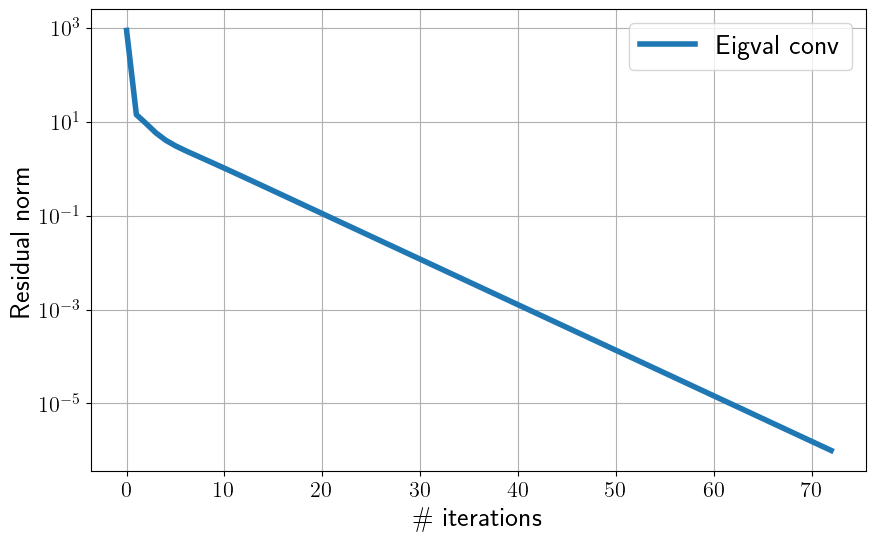

In [48]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - lam * x) for x, lam in zip(conv_vec, conv_val)])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argsort(np.abs(true_eigvals))

plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [49]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(true_eigvals[-3] / true_eigvals[-2])
print(true_eigvals[-1], true_eigvals[-2], true_eigvals[-3])

[0.0160512  0.6462383  0.63199783 0.69685096 0.76003368 0.79337474
 0.80500445 0.80701548 0.80585695 0.80408752 0.80254187 0.80140146
 0.80063103 0.80014249 0.79985084 0.79968929 0.79960998 0.79958041
 0.79957935 0.79959338 0.79961431 0.79963734 0.79965981 0.79968036
 0.79969844 0.79971393 0.79972697 0.79973781 0.79974672 0.799754
 0.79975991 0.79976468 0.79976853 0.79977163 0.79977411 0.79977609
 0.79977768 0.79977895 0.79977996 0.79978076 0.79978141 0.79978192
 0.79978232 0.79978265 0.79978291 0.79978311 0.79978328 0.79978341
 0.79978351 0.79978359 0.79978366 0.79978371 0.79978375 0.79978378
 0.79978381 0.79978383 0.79978385 0.79978386 0.79978387 0.79978388
 0.79978389 0.79978389 0.7997839  0.7997839  0.7997839  0.7997839
 0.79978391 0.79978391 0.79978391 0.79978391 0.79978391 0.79978391]
0.7997839117131972
33.26707067368661 23.745481234975777 18.991253867621246


### Несимметричный случай

In [100]:
A = np.random.randn(n, n)

# A = np.random.randn(n, n)
# Q, _ = np.linalg.qr(A)
# A = Q @ np.diagflat([2, 2, 2] + list(np.random.rand(n - 3))) @ Q.T

In [101]:
true_eigvals, true_eigvec = np.linalg.eig(A)
block_size = 3
print(true_eigvals)
print(np.sort(np.abs(true_eigvals)))
print(true_eigvec.round(5))

[ 1.77838402+0.j          0.93061003+1.64881797j  0.93061003-1.64881797j
  0.36405184+1.50757622j  0.36405184-1.50757622j -2.39239307+1.90952109j
 -2.39239307-1.90952109j -2.03085728+0.79684527j -2.03085728-0.79684527j
 -1.63070763+0.j        ]
[1.55090934 1.55090934 1.63070763 1.77838402 1.89331343 1.89331343
 2.181592   2.181592   3.06101542 3.06101542]
[[ 0.16725+0.j       0.24781-0.32554j  0.24781+0.32554j  0.08857-0.03283j
   0.08857+0.03283j  0.27651+0.24147j  0.27651-0.24147j  0.26001+0.22197j
   0.26001-0.22197j -0.05989+0.j     ]
 [-0.07259+0.j      -0.09253-0.21829j -0.09253+0.21829j  0.17298+0.20645j
   0.17298-0.20645j  0.22582-0.28573j  0.22582+0.28573j  0.12599-0.14605j
   0.12599+0.14605j -0.35473+0.j     ]
 [ 0.24306+0.j       0.274  -0.07106j  0.274  +0.07106j -0.01268+0.28642j
  -0.01268-0.28642j  0.44529+0.j       0.44529-0.j       0.53857+0.j
   0.53857-0.j       0.24987+0.j     ]
 [-0.40418+0.j       0.50947+0.j       0.50947-0.j      -0.09891-0.0875j
  -0.09891+0.

In [102]:
x0 = np.random.randn(n, block_size) #+ 1j * np.random.randn(n, block_size)
max_eigvec, max_eigval, conv_vec, conv_val = block_power_method(A, x0, 500, 1e-6)
print(max_eigvec)
print(max_eigval)
print(true_eigvec[:, n-block_size:n][:, ::-1])

[[-0.02648468 -0.54028714 -0.08021747]
 [ 0.5116045   0.1111582  -0.11784754]
 [ 0.38671461 -0.42527705 -0.42658334]
 [ 0.20876192  0.03932758  0.39798047]
 [-0.2506061  -0.30354552  0.39058536]
 [-0.32249984 -0.10819291  0.01398844]
 [-0.31640458 -0.1766839  -0.58967561]
 [ 0.50401439 -0.04008155  0.0094765 ]
 [-0.14563592  0.23792601 -0.26532117]
 [-0.04762274  0.56572814 -0.26145795]]
[-2.7966398  -1.98814634 -2.10616987]
[[-0.05989283+0.j          0.26001463-0.22197304j  0.26001463+0.22197304j]
 [-0.35472986+0.j          0.12598943+0.14604759j  0.12598943-0.14604759j]
 [ 0.24987074+0.j          0.53857195-0.j          0.53857195+0.j        ]
 [-0.41344602+0.j         -0.24064811+0.3021687j  -0.24064811-0.3021687j ]
 [-0.20054798+0.j         -0.20970161-0.25719187j -0.20970161+0.25719187j]
 [ 0.0160143 +0.j         -0.00804659+0.04895739j -0.00804659-0.04895739j]
 [ 0.71775062+0.j          0.42264587-0.25303421j  0.42264587+0.25303421j]
 [ 0.06270898+0.j          0.08875433+0.041465

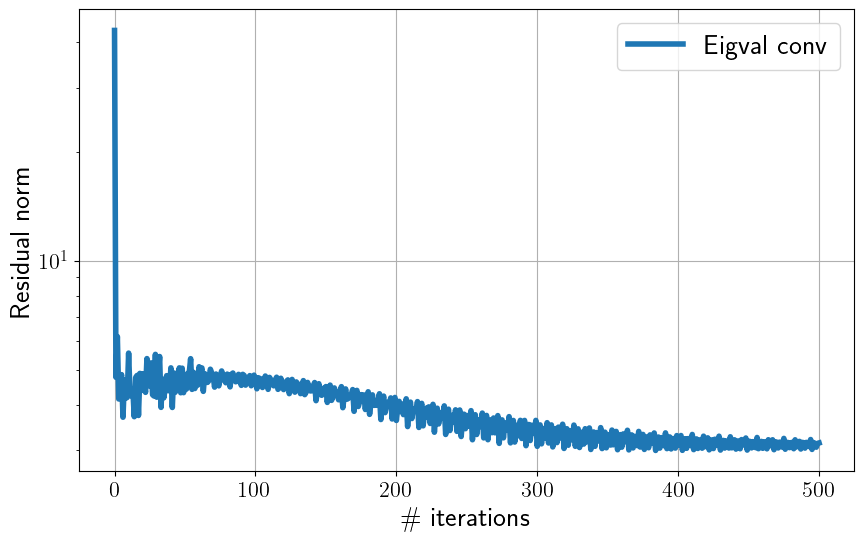

In [99]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - lam * x) for x, lam in zip(conv_vec, conv_val)])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argsort(np.abs(true_eigvals))

plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

#### Какие собственные значения удаётся восстановить, а какие нет?

## Резюме

- Сходимость степенного метода
- Блочный степенной метод 